In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
df = pd.read_json("/home/zeng/INFLUENZA_DATABASE/H3N2/data/isolation_information.json", orient='index')
df = df.replace('', np.nan)

In [4]:
df['region'] = df['location'].str.split(' / ').str.get(0)
df['country'] = df['location'].str.split(' / ').str.get(1)
df.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357698,EPI1447700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-01,NaN,Asia / Malaysia,A/Malaysia/1016/2003,Asia,Malaysia
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_357648,EPI1447603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-12-01,NaN,Oceania / Australia / Tasmania,A/Victoria/101/2003,Oceania,Australia
EPI_ISL_357641,EPI1447592,NaN,EPI1447591,NaN,NaN,NaN,NaN,NaN,2003-08-26,NaN,Oceania / Australia,A/Tasmania/1/2003,Oceania,Australia
EPI_ISL_357613,EPI1447537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-21,NaN,Asia / Singapore,A/Singapore/31/2003,Asia,Singapore


In [5]:
# 按条件修改列值
df.loc[df.region == '/ Taiwan', 'country'] = 'Taiwan'
df.loc[df.region == '/ Taiwan', 'region'] = 'Asia'

df.loc[df.region == '/ SPAIN', 'country'] = 'Spain'
df.loc[df.region == '/ SPAIN', 'region'] = 'Europe'

df.loc[df.region == '/ Laos', 'country'] = 'Laos'
df.loc[df.region == '/ Laos', 'region'] = 'Asia'

In [6]:
df['region'].value_counts()

North America    32753
Asia             22779
Europe           19967
Oceania           6919
South America     4368
Africa            2618
Name: region, dtype: int64

In [7]:
df.country.value_counts()

United States                        24724
Canada                                6314
China                                 5588
Australia                             5432
Japan                                 4708
Spain                                 3243
United Kingdom                        2562
France                                2135
Brazil                                1655
Hong Kong (SAR)                       1407
Russian Federation                    1377
Singapore                             1296
Taiwan                                1198
Netherlands                           1168
Germany                               1156
New Zealand                           1149
Sweden                                1042
India                                  967
Korea_ Republic of                     954
Thailand                               891
Austria                                818
Chile                                  779
Italy                                  771
Norway     

In [8]:
df.groupby('region').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,country
region,,,,,,,,,,,,,
Africa,2584,1303,2233,908,894,892,877,869,2618,0,2618,2618,2618
Asia,20689,9515,14374,5307,5330,5379,5237,5121,22779,0,22779,22779,22776
Europe,19320,6392,13314,5349,5324,5067,4837,4961,19967,0,19967,19967,19960
North America,32492,22615,23506,20477,20316,19485,20010,20051,32753,2,32753,32753,32751
Oceania,6852,5440,6056,1861,1825,1845,1834,1834,6919,0,6919,6919,6919
South America,4253,2376,3000,2165,2139,2125,2135,2141,4368,0,4368,4368,4367


In [9]:
df.groupby('country').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region
country,,,,,,,,,,,,,
Afghanistan,78,72,72,71,70,70,70,69,78,0,78,78,78
Albania,44,13,43,11,11,11,11,11,44,0,44,44,44
Algeria,34,2,32,0,0,0,0,0,34,0,34,34,34
American Samoa,13,9,13,2,2,2,2,2,13,0,13,13,13
Anguilla,3,3,3,0,0,0,0,0,3,0,3,3,3
Argentina,572,262,366,229,228,224,223,223,576,0,576,576,576
Armenia,49,0,49,0,0,0,0,0,49,0,49,49,49
Aruba,12,11,12,0,0,0,0,0,12,0,12,12,12
Australia,5374,4274,4791,1186,1153,1174,1167,1167,5432,0,5432,5432,5432


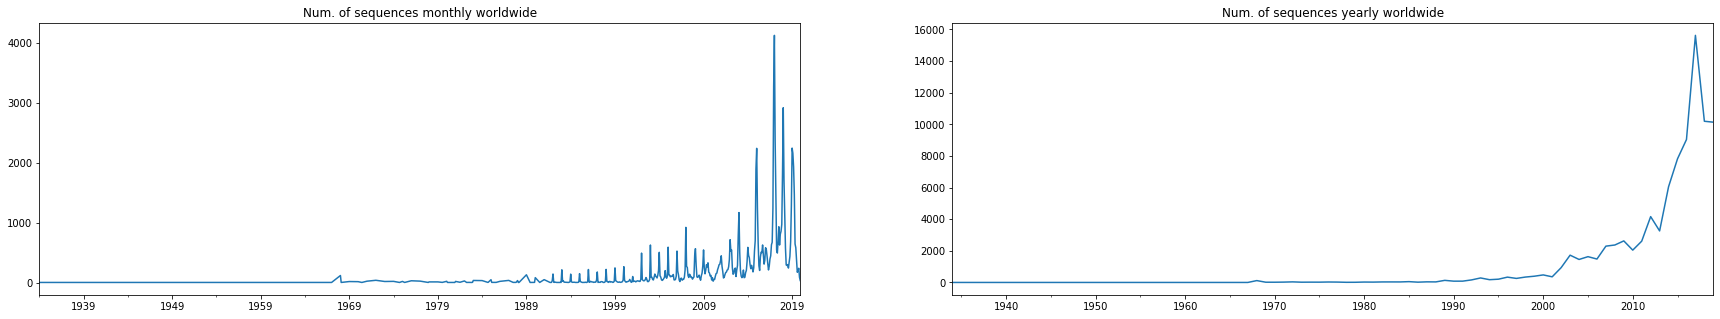

In [10]:
time_index_by_month = pd.to_datetime(df.date.values).to_period('M')
time_index_by_year = pd.to_datetime(df.date.values).to_period('Y')

fig, axes = plt.subplots(1, 2, figsize=(30, 5))
df.groupby(time_index_by_month).size().plot(ax=axes[0], title="Num. of sequences monthly worldwide")
df.groupby(time_index_by_year).size().plot(ax=axes[1], title="Num. of sequences yearly worldwide")

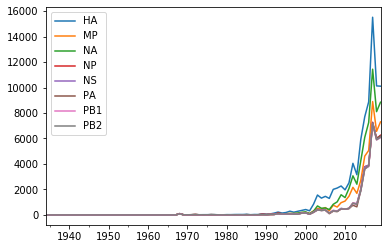

In [11]:
df.iloc[:,0:8].groupby(time_index_by_year).count().plot()

In [12]:
def f(x):
    count = 0
    for i in x:
        if i == np.nan:
            count += 1
    return count

df_with_genome = df[df.iloc[:, 0:8].count(axis='columns') == 8]

In [13]:
df_with_genome.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_302517,EPI1193545,EPI1193548,EPI1193547,EPI1193546,EPI1193549,EPI1193544,EPI1193543,EPI1193542,2003-03-04,NaN,North America / Mexico,A/Mexico/InDRE2664/2003,North America,Mexico
EPI_ISL_154544,EPI502273,EPI502275,EPI502277,EPI502279,EPI502281,EPI501853,EPI502283,EPI502285,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154543,EPI502219,EPI502220,EPI502221,EPI502222,EPI502223,EPI501852,EPI502224,EPI502225,2005-01-01,NaN,North America / United States / Washington,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154540,EPI502300,EPI502302,EPI502304,EPI502306,EPI502308,EPI501849,EPI502310,EPI502312,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States
